In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

from keras.models import load_model


from keras.layers import LSTM, GRU, Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

In [2]:
LR = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/LR_100/*.csv')
RL = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/RL_100/*.csv')
UP = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/UP_100/*.csv')
Down = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/Down_100/*.csv')
BA = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/BA_100/*.csv')
DA = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/DA_100/*.csv')
AD = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/AD_100/*.csv')
AB = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/AB_100/*.csv')
CD = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CD_100/*.csv')
CB = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CB_100/*.csv')

len(LR), len(RL), len(UP), len(Down), len(BA), len(DA), len(AD), len(AB), len(CD), len(CB)

(100, 100, 100, 100, 100, 100, 100, 100, 100, 100)

In [3]:
total_data = LR + RL + UP + Down + BA + DA + AD + AB + CD + CB
dataset = np.zeros((len(total_data), 100, 4))

for i, data in enumerate(total_data):
    tmp = pd.read_csv(data, names=['n','a','b','c','d']).sample(n=100, replace=True).sort_index().iloc[:,1:5]
    dataset[i] = tmp
    
label = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(LR) + [[0, 1, 0 ,0, 0, 0, 0, 0, 0, 0]] * len(RL) 
                 + [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]] * len(UP) + [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]] * len(Down) 
                 + [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]] * len(BA) + [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]] * len(DA) 
                 + [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]] * len(AD) + [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]] * len(AB) 
                 + [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] * len(CD) + [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] * len(CB) )
dataset.shape, label.shape

((1000, 100, 4), (1000, 10))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state=0, test_size=0.3)

callback = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001), 
    ModelCheckpoint(filepath='./weights.h5', save_best_only=True),
    EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=5)
]

In [43]:
K.clear_session()
model_once = 0

In [44]:
model_once = Sequential()
model_once.add(LSTM(20, input_shape=(100,4)))
model_once.add(Dense(32,activation='relu')) 
model_once.add(Dense(128,activation='relu')) 
model_once.add(Dense(64,activation='relu')) 
model_once.add(Dense(10, activation='softmax'))
model_once.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['acc'])

result = model_once.fit(X_train, y_train, validation_split=0.33, epochs=60, batch_size=10, verbose=1)
#result = model_once.fit(X_train, y_train, epochs=35, verbose=2)

Epoch 1/60
47/47 [==============================] - 4s 42ms/step - loss: 2.2420 - acc: 0.1346 - val_loss: 2.0445 - val_acc: 0.2371
Epoch 2/60
47/47 [==============================] - 2s 34ms/step - loss: 2.0052 - acc: 0.2244 - val_loss: 1.8901 - val_acc: 0.2414
Epoch 3/60
47/47 [==============================] - 2s 32ms/step - loss: 1.8755 - acc: 0.2671 - val_loss: 1.8110 - val_acc: 0.2241
Epoch 4/60
47/47 [==============================] - 1s 30ms/step - loss: 1.8608 - acc: 0.2970 - val_loss: 1.8622 - val_acc: 0.3793
Epoch 5/60
47/47 [==============================] - 1s 30ms/step - loss: 1.7759 - acc: 0.3333 - val_loss: 1.6777 - val_acc: 0.3836
Epoch 6/60
47/47 [==============================] - 1s 31ms/step - loss: 1.5404 - acc: 0.4124 - val_loss: 1.6716 - val_acc: 0.4224
Epoch 7/60
47/47 [==============================] - 1s 29ms/step - loss: 1.4185 - acc: 0.4893 - val_loss: 1.2469 - val_acc: 0.4784
Epoch 8/60
47/47 [==============================] - 1s 31ms/step - loss: 1.0961 - a

In [45]:
model_once.evaluate(X_test, y_test)

predict_x=model_once.predict(X_test) 
classes_x_test=np.argmax(predict_x,axis=1)

10/10 [==============================] - 0s 6ms/step - loss: 0.0681 - acc: 0.9800


In [46]:
classes_y_test = []
for i in range(len(y_test)):
    for j in range(10):  #num class 
        if y_test[i][j] == 1:
            classes_y_test.append(j)

count=0
print("Real value : Prediction\n---------------------------")
for i in range(len(X_test)):
    if(classes_x_test[i] != classes_y_test[i]):
        print("   ",classes_y_test[i], "\t   : \t", classes_x_test[i])
        
        count = count + 1
probab = count/len(X_test)
print("\n\nNumber of miscalculation : ",count,"/",len(classes_x_test),"=",round(probab,3))
print("\nAccuracy : ",((1-round(probab,4))*100),"%")
print("0 : LR, 1 : RL, 2 : UP, 3 : DOWN, 4: Left to Down, 5: Right to Down, 6: Down to Right, 7: Down to Left, 8: Up to Right, 9: Up to Left")

Real value : Prediction
---------------------------
    1 	   : 	 7
    7 	   : 	 1
    8 	   : 	 0
    0 	   : 	 1
    6 	   : 	 0
    8 	   : 	 0


Number of miscalculation :  6 / 300 = 0.02

Accuracy :  98.0 %
0 : LR, 1 : RL, 2 : UP, 3 : DOWN, 4: Left to Down, 5: Right to Down, 6: Down to Right, 7: Down to Left, 8: Up to Right, 9: Up to Left


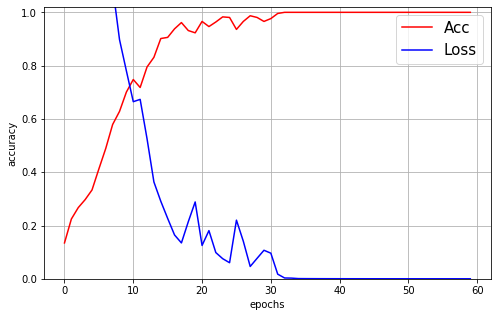

In [47]:
plt.figure(figsize=(8,5))
val_loss = result.history['loss']
val_acc = result.history['acc']

plt.plot(val_acc, label='Acc', color='red')
plt.plot(val_loss, label='Loss', color='blue')

plt.ylim(0,1.02)
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(fontsize=15)
plt.show()

In [48]:
np.array(val_acc)

array([0.13461539, 0.22435898, 0.26709402, 0.29700854, 0.33333334,
       0.41239315, 0.48931623, 0.57905984, 0.62820512, 0.70085472,
       0.74786323, 0.71794873, 0.79487181, 0.83119661, 0.90170938,
       0.90598291, 0.93803418, 0.96153843, 0.93162394, 0.92307693,
       0.96581197, 0.94658118, 0.9636752 , 0.98290598, 0.98076922,
       0.93589741, 0.96581197, 0.98717946, 0.98076922, 0.96581197,
       0.97649574, 0.99572647, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [49]:
np.array(val_loss)

array([2.24195194e+00, 2.00519705e+00, 1.87549520e+00, 1.86084700e+00,
       1.77593386e+00, 1.54038084e+00, 1.41854823e+00, 1.09610343e+00,
       8.97557795e-01, 7.80087352e-01, 6.64650261e-01, 6.73289716e-01,
       5.25753260e-01, 3.63339663e-01, 2.91037709e-01, 2.26617262e-01,
       1.64507911e-01, 1.34606689e-01, 2.14274630e-01, 2.88403213e-01,
       1.25138044e-01, 1.80822745e-01, 9.84692052e-02, 7.54904896e-02,
       6.03643395e-02, 2.20071822e-01, 1.40874058e-01, 4.62536626e-02,
       7.68617913e-02, 1.07067227e-01, 9.61179212e-02, 1.74005721e-02,
       3.07122525e-03, 2.54321168e-03, 8.25451163e-04, 6.41723338e-04,
       5.21872716e-04, 4.39270079e-04, 3.77172983e-04, 3.29971459e-04,
       2.91503413e-04, 2.60978180e-04, 2.34696272e-04, 2.12854677e-04,
       1.94122782e-04, 1.77723414e-04, 1.63697026e-04, 1.50724067e-04,
       1.39636002e-04, 1.29718275e-04, 1.20608631e-04, 1.12992966e-04,
       1.05317733e-04, 9.87362291e-05, 9.26069406e-05, 8.69778378e-05,
      

In [ ]:
lstm_acc = [98, 99, 99, 97.67, 97.67, 97.67, 97.67, 97.67, 97.33, 97.67, 97.67,
           97.33, 99.33, 99, 99.33, 99.33, 99, 97,  96.33, 96.67, 98.33, 98.67, 97, 98, 99, 97.33, 97, ]
convergence_epoch = [60, 62, 44, 55, 35, 45, 53, 43, 24, 43, 52, 22, 31, 40, 32, 22, 43, 35, 53, 43, 46, 25, 53, 43, 32, 53]

In [52]:
acc1 = [0.10470086, 0.30341882, 0.4594017 , 0.54700857, 0.59615386,       0.62179488, 0.69017094, 0.73931623, 0.75641024, 0.75641024,       0.8226496 , 0.84401709, 0.91025639, 0.8226496 , 0.82692307,       0.84829062, 0.87393165, 0.87606835, 0.87820512, 0.90811968,       0.89529914, 0.90598291, 0.91239315, 0.92948717, 0.9337607 ,       0.91666669, 0.91880339, 0.91452992, 0.94230771, 0.92307693,       0.91452992, 0.84401709, 0.90170938, 0.92094016, 0.93589741,       0.95085472, 0.92094016, 0.96794873, 0.98504275, 0.99786323,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc2 = [0.1431624 , 0.23290598, 0.24145299, 0.27350429, 0.32051283,       0.35042736, 0.47222221, 0.62179488, 0.6474359 , 0.78846157,       0.65384614, 0.85042733, 0.94230771, 0.9337607 , 0.94017094,       0.9337607 , 0.95299143, 0.97008544, 0.96153843, 0.96794873,       0.97863245, 0.98290598, 0.98076922, 0.97222221, 0.94871795,       0.95299143, 0.97863245, 0.98290598, 0.96581197, 0.98931623,       0.99572647, 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc3 = [0.26068377, 0.43589744, 0.58547008, 0.56196582, 0.66025639,       0.72649574, 0.75854701, 0.72649574, 0.75427353, 0.82051283,       0.82051283, 0.86324787, 0.91452992, 0.8888889 , 0.88247865,       0.92521369, 0.94871795, 0.97222221, 0.96794873, 0.93589741,       0.97863245, 0.99358976, 0.99786323, 1.        , 0.99786323,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc4 = [0.21153846, 0.32264957, 0.44444445, 0.58974361, 0.63461536,       0.65598291, 0.69017094, 0.70726496, 0.75854701, 0.79273504,       0.81410259, 0.77991456, 0.8226496 , 0.84829062, 0.88247865,       0.94444442, 0.95726496, 0.89102566, 0.88247865, 0.92094016,       0.90598291, 0.90598291, 0.93162394, 0.96153843, 0.95085472,       0.82692307, 0.95512819, 0.97649574, 0.92948717, 0.95299143,       0.93803418, 0.97222221, 0.96581197, 0.98076922, 0.9636752 ,       0.98076922, 0.98504275, 0.98076922, 0.98931623, 0.99358976,       0.99572647, 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc5 = [0.17521368, 0.35470086, 0.41452992, 0.44017094, 0.52350426,       0.55341882, 0.65384614, 0.64102566, 0.69017094, 0.76495725,      0.79487181, 0.77564102, 0.84829062, 0.84188032, 0.89529914,       0.9337607 , 0.9337607 , 0.95940173, 0.94444442, 0.96153843,       0.98717946, 0.98076922, 0.97649574, 0.97008544, 0.99358976,       0.96153843, 0.96794873, 0.97435898, 0.98717946, 0.96153843,       0.97649574, 0.96153843, 0.99358976, 0.98290598, 0.99358976,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc6 = [0.13461539, 0.24358974, 0.38247862, 0.3931624 , 0.4679487 ,       0.54487181, 0.66880339, 0.67094016, 0.70726496, 0.78205127,       0.79273504, 0.79700857, 0.82051283, 0.81837606, 0.77136755,       0.82051283, 0.84401709, 0.80982906, 0.8525641 , 0.84829062,       0.85683763, 0.87393165, 0.87393165, 0.85042733, 0.85897434,       0.89102566, 0.8888889 , 0.89529914, 0.88034189, 0.88247865,       0.83974361, 0.86752135, 0.87606835, 0.91452992, 0.91666669,       0.93589741, 0.94871795, 0.9636752 , 0.91880339, 0.96581197,       0.97435898, 0.98931623, 0.98076922, 0.99358976, 0.99358976,       0.95726496, 0.99572647, 0.99786323, 0.99786323, 0.99786323,       0.99786323, 0.99786323, 0.99572647, 0.99786323, 0.99786323,       0.99786323, 0.99786323, 0.99786323, 0.99786323, 0.99786323]
acc7 = [0.11324786, 0.29487181, 0.43376067, 0.64102566, 0.70299143,       0.72863245, 0.80982906, 0.83760685, 0.85042733, 0.84829062,       0.79914528, 0.84615386, 0.83119661, 0.79914528, 0.87393165,       0.86752135, 0.84615386, 0.86965811, 0.89316237, 0.87820512,       0.89102566, 0.8888889 , 0.86752135, 0.87606835, 0.88034189,       0.88461536, 0.89957267, 0.87606835, 0.90811968, 0.89316237,       0.90598291, 0.90384614, 0.9337607 , 0.97222221, 0.98290598,       0.99358976, 0.99572647, 0.99786323, 0.99786323, 0.99786323,       0.99786323, 0.99145299, 0.98076922, 0.99786323, 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc8 = [0.13247864, 0.29914531, 0.38247862, 0.44444445, 0.4957265 ,       0.6025641 , 0.72863245, 0.76923078, 0.83547008, 0.83119661,       0.85470086, 0.91025639, 0.94230771, 0.94017094, 0.94658118,       0.97222221, 0.96581197, 0.95726496, 0.93803418, 0.97863245,       0.98717946, 0.98504275, 0.94658118, 0.93589741, 0.96794873,       0.98931623, 0.98290598, 0.93162394, 0.98717946, 0.99358976,       0.99786323, 0.99786323, 0.99786323, 0.99786323, 0.99786323,       0.99572647, 0.99786323, 0.99572647, 0.97863245, 0.99358976,       0.98076922, 0.98931623, 0.97008544, 0.98931623, 0.99358976,       0.99358976, 0.99786323, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc9 = [0.14529915, 0.41880342, 0.54487181, 0.64102566, 0.64957267,       0.72863245, 0.79059827, 0.77991456, 0.68589741, 0.75213677,       0.75854701, 0.80128205, 0.81196582, 0.88675213, 0.9337607 ,       0.91666669, 0.94658118, 0.96581197, 0.99145299, 0.99358976,       0.99786323, 1.        , 0.99786323, 0.99572647, 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc10 = [0.13247864, 0.16666667, 0.26068377, 0.30128205, 0.32692307,       0.32478634, 0.3974359 , 0.41239315, 0.42735043, 0.51068377,       0.57051283, 0.59401709, 0.57692307, 0.59615386, 0.60897434,       0.68162394, 0.74358976, 0.85897434, 0.88247865, 0.94658118,       0.94444442, 0.94871795, 0.94871795, 0.95299143, 0.9636752 ,       0.97222221, 0.9636752 , 0.95512819, 0.97435898, 0.97222221,       0.97435898, 0.96794873, 0.92948717, 0.94017094, 0.8888889 ,       0.96581197, 0.98504275, 0.99358976, 0.99358976, 0.99572647,       0.99786323, 0.99358976, 0.99145299, 0.98717946, 0.98290598,       0.98504275, 0.95512819, 0.97435898, 0.98717946, 0.99145299,       0.99145299, 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc11 = [0.08974359, 0.21153846, 0.33547008, 0.3931624 , 0.47222221,       0.57478631, 0.62393165, 0.70512819, 0.69230771, 0.74786323,       0.78846157, 0.79273504, 0.83760685, 0.85470086, 0.86965811,       0.88461536, 0.90384614, 0.91239315, 0.91452992, 0.95726496,       0.93162394, 0.95940173, 0.97863245, 0.98717946, 0.97222221,       0.96581197, 0.95512819, 0.97222221, 0.96581197, 0.94871795,       0.95085472, 0.98717946, 0.98717946, 0.99786323, 0.95299143,       0.94230771, 0.90811968, 0.96794873, 0.96794873, 0.98290598,       0.98717946, 0.97222221, 0.98931623, 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc12 = [0.13675214, 0.35470086, 0.39102563, 0.4636752 , 0.53846157,       0.61752135, 0.71794873, 0.73076922, 0.7863248 , 0.84188032,       0.86965811, 0.8611111 , 0.90170938, 0.95299143, 0.99145299,       0.99572647, 0.99786323, 0.99786323, 0.97863245, 0.97649574,       0.97222221, 0.86324787, 0.94017094, 0.98717946, 0.98504275,       0.95940173, 0.97008544, 0.97649574, 0.99358976, 0.99145299,       0.98290598, 0.99786323, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc13 = [0.12820514, 0.26282051, 0.36324787, 0.39957264, 0.46153846,       0.54487181, 0.60042733, 0.67948717, 0.72435898, 0.74358976,       0.77564102, 0.79059827, 0.76495725, 0.77136755, 0.76709402,       0.77350426, 0.80555558, 0.81196582, 0.82905984, 0.86324787,       0.87179488, 0.91666669, 0.90811968, 0.90598291, 0.91025639,       0.90170938, 0.90384614, 0.76923078, 0.73504275, 0.90170938,       0.8888889 , 0.94444442, 0.96153843, 0.97649574, 0.98076922,       0.99358976, 0.99786323, 0.98076922, 0.98931623, 0.99358976,       0.99572647, 0.99572647, 0.99572647, 0.96794873, 0.96581197,       0.98717946, 0.95726496, 0.98504275, 0.97222221, 0.98076922,       0.97222221, 0.98931623, 0.97222221, 0.99358976, 0.98931623,       0.99358976, 1.        , 1.        , 1.        , 1.        ]
acc14 = [2.26198959e+00, 1.88833916e+00, 1.59294403e+00, 1.33644474e+00,       9.40268755e-01, 7.89331853e-01, 6.61048234e-01, 5.80133438e-01,       4.92388159e-01, 3.96732658e-01, 3.08436781e-01, 3.90612513e-01,       3.56440932e-01, 2.83714950e-01, 3.85322630e-01, 3.83087963e-01,       3.73008341e-01, 3.70439202e-01, 1.92631751e-01, 1.65364355e-01,       1.08030789e-01, 6.77900612e-02, 5.14625758e-02, 1.08763456e-01,       8.81118402e-02, 2.64122754e-01, 2.18394026e-01, 2.25058511e-01,       8.07370916e-02, 1.17865123e-01, 7.94317201e-02, 5.67398481e-02,       4.59688827e-02, 1.28451720e-01, 6.84994906e-02, 1.25372484e-02,       1.76098291e-02, 1.86947696e-02, 1.09410975e-02, 1.13212112e-02,       7.25964503e-03, 2.86355149e-03, 4.22470365e-03, 2.93104840e-03,       5.50696801e-04, 3.31187592e-04, 2.76016275e-04, 2.44799419e-04,       2.12388433e-04, 1.88766513e-04, 1.72797430e-04, 1.55123256e-04,       1.42089470e-04, 1.29926659e-04, 1.19761375e-04, 1.10668130e-04,       1.02830018e-04, 9.52274931e-05, 8.89132134e-05, 8.29486962e-05]
acc15 = [0.13461539, 0.22435898, 0.26709402, 0.29700854, 0.33333334,       0.41239315, 0.48931623, 0.57905984, 0.62820512, 0.70085472,       0.74786323, 0.71794873, 0.79487181, 0.83119661, 0.90170938,       0.90598291, 0.93803418, 0.96153843, 0.93162394, 0.92307693,       0.96581197, 0.94658118, 0.9636752 , 0.98290598, 0.98076922,       0.93589741, 0.96581197, 0.98717946, 0.98076922, 0.96581197,       0.97649574, 0.99572647, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]

In [56]:
loss1 = [2.28029680e+00, 1.85183990e+00, 1.40816164e+00, 1.14463639e+00,       9.71194267e-01, 8.95784676e-01, 7.35233188e-01, 5.92945933e-01,       5.28491437e-01, 5.55394888e-01, 4.27709818e-01, 4.11158800e-01,       2.12888420e-01, 5.02943873e-01, 3.68080169e-01, 3.09302628e-01,       2.87802279e-01, 2.99076825e-01, 2.30527282e-01, 1.69189408e-01,       1.85132816e-01, 1.48814455e-01, 1.47602886e-01, 1.27869159e-01,       1.22274056e-01, 2.04138637e-01, 1.58387065e-01, 1.45710036e-01,       1.21648028e-01, 1.88847870e-01, 2.54387110e-01, 4.33759451e-01,       1.94296017e-01, 1.47079781e-01, 1.21460877e-01, 1.00470774e-01,       2.17580751e-01, 1.29612878e-01, 8.99237245e-02, 3.06070000e-02,       3.98751674e-03, 1.93667365e-03, 1.02954777e-03, 5.42417460e-04,       3.93432187e-04, 3.22743435e-04, 2.65021750e-04, 2.28938734e-04,       2.02647658e-04, 1.75403999e-04, 1.58879164e-04, 1.41955054e-04,       1.28404121e-04, 1.18542281e-04, 1.08195658e-04, 9.91827474e-05,       9.20152088e-05, 8.50705037e-05, 7.94432854e-05, 7.36749353e-05]
loss2 = [2.27518082e+00, 2.05432534e+00, 1.99166012e+00, 1.93093932e+00,       1.75092185e+00, 1.54157341e+00, 1.26097202e+00, 9.77473974e-01,       8.54285598e-01, 5.08399844e-01, 9.19373393e-01, 3.93623501e-01,       2.12144911e-01, 2.12409973e-01, 2.13082105e-01, 2.14975834e-01,       2.10363254e-01, 1.13628499e-01, 1.22706674e-01, 1.05629802e-01,       7.93346390e-02, 6.09377697e-02, 6.96658194e-02, 1.13728590e-01,       1.38254657e-01, 1.67088985e-01, 6.01978824e-02, 7.44526535e-02,       1.25903860e-01, 4.10727039e-02, 1.70282423e-02, 3.68790259e-03,       1.87520392e-03, 1.27774128e-03, 9.43172898e-04, 7.54338689e-04,       6.28626498e-04, 5.19982015e-04, 4.46087506e-04, 3.88166722e-04,       3.42373620e-04, 2.99101404e-04, 2.65578041e-04, 2.39964516e-04,       2.14428030e-04, 1.93689528e-04, 1.75944646e-04, 1.61351680e-04,       1.47709827e-04, 1.35494280e-04, 1.24173603e-04, 1.14444898e-04,       1.05737221e-04, 9.73075657e-05, 8.98992439e-05, 8.33622689e-05,       7.73447027e-05, 7.17795920e-05, 6.64153195e-05, 6.10929128e-05]
loss3 = [2.00595999e+00, 1.32254148e+00, 1.03460538e+00, 9.95137751e-01,       8.04951072e-01, 6.54044449e-01, 5.86616218e-01, 5.52712202e-01,       4.50010687e-01, 3.55999559e-01, 3.76117557e-01, 3.72592241e-01,       2.67316014e-01, 3.55200320e-01, 3.35344076e-01, 1.91713229e-01,       1.61668077e-01, 1.01441555e-01, 1.49102241e-01, 2.24067703e-01,       9.40483585e-02, 2.91633978e-02, 2.14389097e-02, 2.89529446e-03,       3.82813974e-03, 1.01656967e-03, 5.40581124e-04, 4.29266074e-04,       3.59858008e-04, 3.08115355e-04, 2.70783639e-04, 2.40801091e-04,       2.16208660e-04, 1.95484274e-04, 1.78615854e-04, 1.63495919e-04,       1.50716107e-04, 1.39578784e-04, 1.29068416e-04, 1.20248304e-04,       1.12379079e-04, 1.05189523e-04, 9.84741491e-05, 9.27965302e-05,       8.74538746e-05, 8.27913755e-05, 7.82436036e-05, 7.39919415e-05,       7.02675970e-05, 6.67459317e-05, 6.33084928e-05, 6.02558976e-05,       5.73943616e-05, 5.47305754e-05, 5.23664567e-05, 4.98194022e-05,       4.77375397e-05, 4.57391543e-05, 4.36674236e-05, 4.18245472e-05]
loss4 = [2.12327051e+00, 1.63076556e+00, 1.33145916e+00, 1.00858879e+0,       7.74620235e-01, 8.12033057e-01, 6.13858759e-01, 5.59790909e-01,       4.61983204e-01, 4.13852543e-01, 4.13789123e-01, 4.24952835e-01,       3.27292681e-01, 3.26004773e-01, 2.64289826e-01, 1.98577166e-01,       1.38804868e-01, 2.58642733e-01, 2.11205408e-01, 2.23571643e-01,       3.25444728e-01, 3.39659452e-01, 2.05972657e-01, 1.50404543e-01,       2.04002440e-01, 4.60411102e-01, 1.34636253e-01, 6.59013838e-02,       2.35444188e-01, 1.57331601e-01, 1.99489459e-01, 9.78979021e-02,       1.13779515e-01, 1.06651977e-01, 1.17021106e-01, 9.58981737e-02,       5.95669411e-02, 5.89584187e-02, 5.29270545e-02, 2.55598463e-02,       7.72341760e-03, 5.25174756e-03, 4.96063568e-03, 2.48116697e-03,       1.97422341e-03, 1.54754065e-03, 1.24613789e-03, 9.15537763e-04,       7.55822926e-04, 6.52790943e-04, 5.83286921e-04, 5.09029895e-04,       4.50734602e-04, 4.14469570e-04, 3.58807505e-04, 3.25041998e-04,       3.01358814e-04, 2.77614192e-04, 2.53010279e-04, 2.26612363e-04]
loss5 = [2.18178654e+00, 1.60817277e+00, 1.39735115e+00, 1.26718962e+00,       1.02893460e+00, 9.23230290e-01, 7.41460621e-01, 8.59702349e-01,       6.45074069e-01, 5.63731849e-01, 5.25452375e-01, 5.70181251e-01,       3.44903529e-01, 4.61442649e-01, 2.99313426e-01, 2.42207661e-01,       2.26445049e-01, 1.21962734e-01, 1.69858873e-01, 1.03081606e-01,       9.14945230e-02, 5.75316995e-02, 8.31903219e-02, 1.48775741e-01,       5.19107841e-02, 1.53424472e-01, 1.19621612e-01, 1.27861470e-01,       5.32982647e-02, 1.70339733e-01, 9.60018113e-02, 1.72484115e-01,       2.73170657e-02, 8.22100118e-02, 2.82795038e-02, 6.83842693e-03,       1.27310422e-03, 8.44722323e-04, 6.15293626e-04, 2.44501367e-04,       1.32395886e-04, 9.08319853e-05, 6.04817724e-05, 4.43493300e-05,       3.83117294e-05, 3.41797750e-05, 3.11747499e-05, 2.59666795e-05,       2.34467079e-05, 2.06916375e-05, 1.93353644e-05, 1.82816857e-05,       1.60743712e-05, 1.50637006e-05, 1.37952511e-05, 1.20809354e-05,       1.13317656e-05, 1.05018134e-05, 9.43827581e-06, 9.06395962e-06]
loss6 = [2.24195194e+00, 2.00519705e+00, 1.87549520e+00, 1.86084700e+00,       1.77593386e+00, 1.54038084e+00, 1.41854823e+00, 1.09610343e+00,       8.97557795e-01, 7.80087352e-01, 6.64650261e-01, 6.73289716e-01,       5.25753260e-01, 3.63339663e-01, 2.91037709e-01, 2.26617262e-01,       1.64507911e-01, 1.34606689e-01, 2.14274630e-01, 2.88403213e-01,       1.25138044e-01, 1.80822745e-01, 9.84692052e-02, 7.54904896e-02,       6.03643395e-02, 2.20071822e-01, 1.40874058e-01, 4.62536626e-02,       7.68617913e-02, 1.07067227e-01, 9.61179212e-02, 1.74005721e-02,       3.07122525e-03, 2.54321168e-03, 8.25451163e-04, 6.41723338e-04,       5.21872716e-04, 4.39270079e-04, 3.77172983e-04, 3.29971459e-04,       2.91503413e-04, 2.60978180e-04, 2.34696272e-04, 2.12854677e-04,       1.94122782e-04, 1.77723414e-04, 1.63697026e-04, 1.50724067e-04,       1.39636002e-04, 1.29718275e-04, 1.20608631e-04, 1.12992966e-04,       1.05317733e-04, 9.87362291e-05, 9.26069406e-05, 8.69778378e-05,       8.18258995e-05, 7.69499311e-05, 7.25091522e-05, 6.84631959e-05]
loss7 = [2.30367780e+00, 1.94754064e+00, 1.42722452e+00, 9.18125808e-01,       7.15403557e-01, 5.85461557e-01, 5.02245188e-01, 3.43244344e-01,       3.22882295e-01, 2.94150054e-01, 4.24730420e-01, 3.39980930e-01,       3.39225650e-01, 4.78357702e-01, 2.33153582e-01, 2.88880646e-01,       2.83404768e-01, 1.94633752e-01, 1.79046795e-01, 1.96114555e-01,       1.79520503e-01, 1.87476665e-01, 2.51202255e-01, 2.88399667e-01,       2.83795536e-01, 2.17070684e-01, 2.02357203e-01, 2.98683137e-01,       2.08114058e-01, 2.14335665e-01, 1.95269451e-01, 1.75924480e-01,       1.72401816e-01, 9.89347771e-02, 5.64483441e-02, 3.05296667e-02,       1.90000553e-02, 1.76089760e-02, 1.49270436e-02, 1.23920217e-02,       1.22903287e-02, 3.42481211e-02, 5.71576394e-02, 1.04702022e-02,       1.49456982e-03, 6.53598690e-04, 4.73655149e-04, 3.80464306e-04,       3.22456326e-04, 2.72969075e-04, 2.40016554e-04, 2.10989732e-04,       1.88089864e-04, 1.65129924e-04, 1.48833482e-04, 1.36545626e-04,       1.24295271e-04, 1.14155489e-04, 1.05836349e-04, 9.79520191e-05]
loss8 = [2.26845860e+00, 1.81424594e+00, 1.41770482e+00, 1.37665522e+00,       1.21450436e+00, 8.87027204e-01, 6.63496792e-01, 5.46041250e-01,       3.84844124e-01, 4.04607743e-01, 3.15076679e-01, 2.06641704e-01,       1.69069692e-01, 1.98896185e-01, 1.89776212e-01, 1.07958362e-01,       1.11542180e-01, 1.14054307e-01, 2.02363849e-01, 8.22813064e-02,       4.84799482e-02, 4.99878377e-02, 1.84653118e-01, 2.30310291e-01,       1.54947460e-01, 4.28430773e-02, 7.00787380e-02, 2.04211965e-01,       5.57767376e-02, 3.46143395e-02, 1.32803628e-02, 1.10219968e-02,       5.71137853e-03, 5.48578193e-03, 5.21349860e-03, 4.50645434e-03,       5.44212945e-03, 1.54664908e-02, 9.34287980e-02, 2.76799873e-02,       7.35305324e-02, 4.53664735e-02, 9.78118926e-02, 7.21196905e-02,       3.08302734e-02, 3.99259590e-02, 8.75249412e-03, 1.47983083e-03,       8.34576320e-04, 5.89771837e-04, 4.49929910e-04, 3.68681067e-04,       3.10314412e-04, 2.65050476e-04, 2.30348378e-04, 2.01483577e-04,       1.77696202e-04, 1.58470488e-04, 1.41701574e-04, 1.27584251e-04]
loss9 = [2.21994638e+00, 1.55216897e+00, 1.17426479e+00, 8.95662248e-01,       7.20303416e-01, 6.26790643e-01, 5.30529380e-01, 5.03847122e-01,       7.77392507e-01, 4.83550906e-01, 4.71273750e-01, 4.50730056e-01,       4.05452192e-01, 2.78857589e-01, 1.84515700e-01, 2.20180556e-01,       1.65239468e-01, 7.65473470e-02, 2.35319007e-02, 3.05045396e-02,       9.06660408e-03, 3.29688471e-03, 4.01176978e-03, 1.14415353e-02,       9.49746522e-04, 6.49908907e-04, 5.12034225e-04, 4.32811910e-04,       3.67618282e-04, 3.22715670e-04, 2.85718503e-04, 2.54698185e-04,       2.30393562e-04, 2.08555633e-04, 1.90316350e-04, 1.75519541e-04,       1.61469041e-04, 1.49542771e-04, 1.39200070e-04, 1.29733846e-04,       1.20865378e-04, 1.13353381e-04, 1.06060616e-04, 9.97248499e-05,       9.40163009e-05, 8.87874921e-05, 8.38485212e-05, 7.91510975e-05,       7.47180311e-05, 7.08336520e-05, 6.74457988e-05, 6.36677287e-05,       6.07177826e-05, 5.77415813e-05, 5.50456643e-05, 5.24553034e-05,       5.00927345e-05, 4.79401424e-05, 4.58488030e-05, 4.38125899e-05]
loss10 = [2.28027916e+00, 2.12036896e+00, 1.92242575e+00, 1.70393693e+00,       1.64404559e+00, 1.52946937e+00, 1.32364285e+00, 1.50772643e+00,       1.29567945e+00, 1.04819787e+00, 9.02819574e-01, 8.35494280e-01,       9.28614616e-01, 8.11610103e-01, 8.37130070e-01, 6.65436029e-01,       5.99938214e-01, 3.92343700e-01, 3.15209717e-01, 1.85993940e-01,       1.71975404e-01, 2.23384738e-01, 1.76829532e-01, 1.73292786e-01,       1.06717125e-01, 1.04117319e-01, 1.29569426e-01, 1.88455433e-01,       8.89080018e-02, 1.12716839e-01, 9.18106288e-02, 1.20214731e-01,       2.25273713e-01, 2.50634432e-01, 2.66872942e-01, 1.28311113e-01,       6.48109019e-02, 5.04551940e-02, 3.12658288e-02, 2.51610149e-02,       2.50932351e-02, 4.20281105e-02, 7.01276958e-02, 5.00342175e-02,       4.96651866e-02, 5.86936437e-02, 1.83325157e-01, 1.09570876e-01,       4.97123413e-02, 3.79288457e-02, 2.31309179e-02, 6.22242736e-03,       3.16684321e-03, 1.31004537e-03, 9.28687165e-04, 7.68357248e-04,       6.58730918e-04, 5.73541620e-04, 4.99971153e-04, 4.27649007e-04]
loss11 = [2.31309533e+00, 2.07800627e+00, 1.72365999e+00, 1.56618428e+00,       1.22833216e+00, 9.53051507e-01, 7.65447736e-01, 5.62339127e-01,       5.79468966e-01, 4.75724518e-01, 4.01511341e-01, 4.42317337e-01,       3.82524580e-01, 3.02491188e-01, 2.75468916e-01, 2.26358026e-01,       2.02515721e-01, 2.05991700e-01, 2.34551877e-01, 1.46090478e-01,       2.16268376e-01, 1.37444139e-01, 7.05264136e-02, 4.40160297e-02,       7.61859566e-02, 1.31986216e-01, 1.29947230e-01, 9.01600048e-02,       8.91729817e-02, 2.20222339e-01, 1.36715233e-01, 5.38744517e-02,       3.96730080e-02, 1.23789627e-02, 2.01848656e-01, 2.17106968e-01,       2.62669623e-01, 7.79867694e-02, 9.90822390e-02, 3.78370620e-02,       4.34951298e-02, 9.33412015e-02, 2.15151180e-02, 3.38321552e-03,       2.51243659e-03, 2.12615565e-03, 7.47718557e-04, 4.76713991e-04,       3.90576228e-04, 3.33260396e-04, 2.89324264e-04, 2.52345460e-04,       2.21945229e-04, 1.99757327e-04, 1.81194657e-04, 1.67668870e-04,       1.53151283e-04, 1.41825469e-04, 1.32958899e-04, 1.23408172e-04]
loss12 = [2.26052880e+00, 1.88274407e+00, 1.63084412e+00, 1.35958612e+00,       1.04359210e+00, 8.31519783e-01, 6.64403677e-01, 6.07048929e-01,       4.08258736e-01, 3.18848103e-01, 3.14156860e-01, 3.16615045e-01,       2.80020863e-01, 1.39621139e-01, 3.13228406e-02, 2.06434950e-02,       5.88284666e-03, 1.21367620e-02, 6.22160770e-02, 8.08282048e-02,       1.19257048e-01, 4.65903461e-01, 2.32310206e-01, 4.72371541e-02,       5.44274189e-02, 1.58647880e-01, 1.12316668e-01, 1.56847894e-01,       2.63875220e-02, 2.59125438e-02, 6.28048554e-02, 6.16864301e-03,       1.94194645e-03, 1.04758306e-03, 6.40425249e-04, 5.15453052e-04,       4.32632776e-04, 3.69992893e-04, 3.22596490e-04, 2.84759648e-04,       2.53661012e-04, 2.26830176e-04, 2.04957716e-04, 1.85798999e-04,       1.69854320e-04, 1.55826216e-04, 1.43378798e-04, 1.32635425e-04,       1.23073434e-04, 1.14044313e-04, 1.06335363e-04, 9.96335439e-05,       9.29988746e-05, 8.74672405e-05, 8.22027287e-05, 7.75383960e-05,       7.31796754e-05, 6.91717723e-05, 6.55307376e-05, 6.21907457e-05]
loss13 = [2.21985340e+00, 1.85140133e+00, 1.61034405e+00, 1.35294712e+00,       1.24794471e+00, 1.10626447e+00, 9.89918768e-01, 7.70118535e-01,       6.04931712e-01, 5.40585041e-01, 4.22671467e-01, 4.79878247e-01,       4.40340340e-01, 4.21726465e-01, 4.40412343e-01, 4.78094310e-01,       3.74873370e-01, 3.21443945e-01, 2.98088610e-01, 2.71298766e-01,       2.66247869e-01, 2.00158939e-01, 2.26257667e-01, 2.06664488e-01,       1.91581056e-01, 1.88678592e-01, 2.47346640e-01, 7.39956558e-01,       6.53647304e-01, 2.83759177e-01, 2.87386686e-01, 1.57590210e-01,       9.57114249e-02, 9.39942598e-02, 7.70708174e-02, 2.36033741e-02,       9.98899247e-03, 5.69194481e-02, 3.43412422e-02, 1.51732210e-02,       9.27766506e-03, 1.04760667e-02, 1.90153103e-02, 1.68334663e-01,       1.46486685e-01, 3.87437567e-02, 1.46612450e-01, 4.81060185e-02,       1.16251409e-01, 7.75202364e-02, 9.36072841e-02, 3.03218514e-02,       8.92655402e-02, 2.62457244e-02, 1.17256857e-01, 1.45738497e-02,       1.24849216e-03, 7.82282732e-04, 6.05565845e-04, 4.96889406e-04]
loss14 = [2.26198959e+00, 1.88833916e+00, 1.59294403e+00, 1.33644474e+00,       9.40268755e-01, 7.89331853e-01, 6.61048234e-01, 5.80133438e-01,       4.92388159e-01, 3.96732658e-01, 3.08436781e-01, 3.90612513e-01,       3.56440932e-01, 2.83714950e-01, 3.85322630e-01, 3.83087963e-01,       3.73008341e-01, 3.70439202e-01, 1.92631751e-01, 1.65364355e-01,       1.08030789e-01, 6.77900612e-02, 5.14625758e-02, 1.08763456e-01,       8.81118402e-02, 2.64122754e-01, 2.18394026e-01, 2.25058511e-01,       8.07370916e-02, 1.17865123e-01, 7.94317201e-02, 5.67398481e-02,       4.59688827e-02, 1.28451720e-01, 6.84994906e-02, 1.25372484e-02,       1.76098291e-02, 1.86947696e-02, 1.09410975e-02, 1.13212112e-02,       7.25964503e-03, 2.86355149e-03, 4.22470365e-03, 2.93104840e-03,       5.50696801e-04, 3.31187592e-04, 2.76016275e-04, 2.44799419e-04,       2.12388433e-04, 1.88766513e-04, 1.72797430e-04, 1.55123256e-04,       1.42089470e-04, 1.29926659e-04, 1.19761375e-04, 1.10668130e-04,       1.02830018e-04, 9.52274931e-05, 8.89132134e-05, 8.29486962e-05]
loss15 = [2.24195194e+00, 2.00519705e+00, 1.87549520e+00, 1.86084700e+00,       1.77593386e+00, 1.54038084e+00, 1.41854823e+00, 1.09610343e+00,       8.97557795e-01, 7.80087352e-01, 6.64650261e-01, 6.73289716e-01,       5.25753260e-01, 3.63339663e-01, 2.91037709e-01, 2.26617262e-01,       1.64507911e-01, 1.34606689e-01, 2.14274630e-01, 2.88403213e-01,       1.25138044e-01, 1.80822745e-01, 9.84692052e-02, 7.54904896e-02,       6.03643395e-02, 2.20071822e-01, 1.40874058e-01, 4.62536626e-02,       7.68617913e-02, 1.07067227e-01, 9.61179212e-02, 1.74005721e-02,       3.07122525e-03, 2.54321168e-03, 8.25451163e-04, 6.41723338e-04,       5.21872716e-04, 4.39270079e-04, 3.77172983e-04, 3.29971459e-04,       2.91503413e-04, 2.60978180e-04, 2.34696272e-04, 2.12854677e-04,       1.94122782e-04, 1.77723414e-04, 1.63697026e-04, 1.50724067e-04,       1.39636002e-04, 1.29718275e-04, 1.20608631e-04, 1.12992966e-04,       1.05317733e-04, 9.87362291e-05, 9.26069406e-05, 8.69778378e-05,       8.18258995e-05, 7.69499311e-05, 7.25091522e-05, 6.84631959e-05]

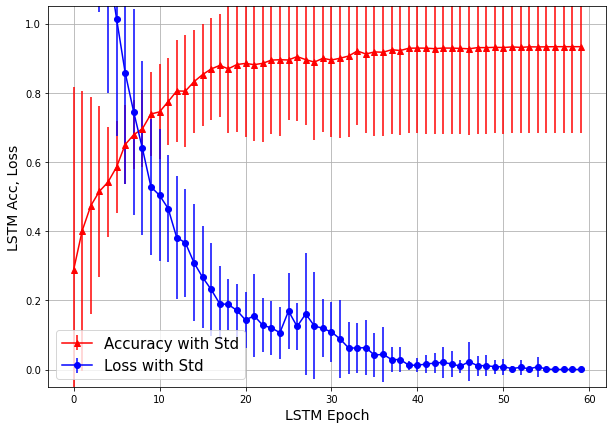

In [57]:
ACC, LOSS, acc_std, loss_std = [], [], [], []
x = np.arange(0,60)
tmp_lst_acc, tmp_lst_loss = [], []

for j in range(60):
    tmp, tmp_lst_acc = 0, []
    for i in range(1, 16):
        tmp = tmp + globals()['acc{}'.format(i)][j]
        tmp_lst_acc.append(globals()['acc{}'.format(i)][j])
        
    ACC.append(tmp/15)
    acc_std.append(np.std(tmp_lst_acc))

    
for j in range(60):
    tmp, tmp_lst_loss = 0, []
    for i in range(1, 16):
        tmp = tmp + globals()['loss{}'.format(i)][j]
        tmp_lst_loss.append(globals()['loss{}'.format(i)][j])
        
    loss_std.append(np.std(tmp_lst_loss))
    LOSS.append(tmp/15)

plt.figure(figsize = (10,7))
plt.errorbar(x, ACC, yerr = acc_std, label='Accuracy with Std', c='r', marker='^')
#plt.plot(ACC, c='r')


plt.errorbar(x, LOSS, yerr = loss_std, label='Loss with Std', c='b', marker='o')
#plt.plot(LOSS, c='b', )

plt.ylim(-0.05,1.05)
plt.legend(fontsize=15)
plt.grid(True)
plt.ylabel('LSTM Acc, Loss', fontsize=14)
plt.xlabel('LSTM Epoch', fontsize=14)
plt.show()

In [ ]:
np.std(lstm_acc), np.mean(lstm_acc)

In [ ]:
np.std(convergence_epoch), np.mean(convergence_epoch)

In [ ]:
plt.errorbar(x2, total_c_W, yerr=yerr_total_c_W, label='Deviation of weight variance', marker='o', c='black')
